In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import urllib
import json
import os
os.environ['PROJ_LIB'] = r'C:\Users\XXXXX\Anaconda3\pkgs\proj4-5.2.0- ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

Question 1

In [2]:
def f(i):
    global fn
    return(eval(fn))


def riemann_sum(a,b,n,fn):
    sum=0
    n_array=np.linspace(a,b,n)
    for x in n_array:
        sum+=eval(fn)*(b-a)/n
    return sum

Question 2

In [3]:
def unit_circle(N):
    N_return=[]
    for i in range(N):
        x=random.uniform(-1,1)
        pm=random.randint(0,1)
        if pm==0:
            y=(-1)*np.sqrt(1-x**2)
        else:
            y=np.sqrt(1-x**2)
        N_return.append([x,y])
    return N_return


def visual(points):
    x_coordinates=[]
    y_coordinates=[]
    for i in points:
        plt.scatter(i[0],i[1])
    plt.show()

Question 3

In [4]:
def unit_circle_3d(N):
    N_return=[]
    for i in range(N):
        r=random.uniform(-1,1)
        theta=random.randint(0,360)
        x=r*np.cos(np.radians(theta))
        y=r*np.sin(np.radians(theta))
        pm=random.randint(0,1)
        if pm==0:
            z=(-1)*np.sqrt(1-r**2)
        else:
            z=np.sqrt(1-r**2)
        N_return.append([x,y,z])
    return N_return


def visual_3d(points):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    x_coordinates=[]
    y_coordinates=[]
    z_coordinates=[]
    for i in points:
        ax.scatter(i[0],i[1],i[2])
    plt.show()

Question 4

In [5]:
def unit_circle_high_order(N,dimension):
    N_return=[]
    for i in range(N):
        N_return=[]
        for i in range(N):
            numbers=[]
            counter=0
            for j in range(dimension):
                counter+=1
                bound=0
                for k in numbers:
                    bound+=k**2    
                if counter==dimension:
                    number=np.sqrt(1-bound)
                else:
                    number=random.uniform(-1+bound,1-bound)**2
                pm=random.randint(0,1)
                if pm==0:
                    number=(-1)*number
                numbers.append(number)
            N_return.append(numbers)
    return N_return

Question 5

In [6]:
def stop():
    with urllib.request.urlopen("https://data.ibb.gov.tr/api/3/action/datastore_search?resource_id=d1f7c258-bbc1-406f-9ab2-7a7c1797c673&limit=100") as url:
        source = url.read()
        json_read=json.loads(source)
        stop=[]
        for i in json_read['result']['records']:
            stop_id=i['stop_id']
            stop_lat=i['stop_lat']
            stop_lon=i['stop_lon']
            stop.append([stop_id,stop_lat,stop_lon])
    return stop

Yukarıdaki kodda verileri urllib requesti ile çağırıp json kütüphanesi ile işlenebilir hale getiriyorum.
Daha sonra elde ettiğim sözlükteki duraklara ait id,enlem ve boylam bilgilirini alıp stop arrayine atıyorum

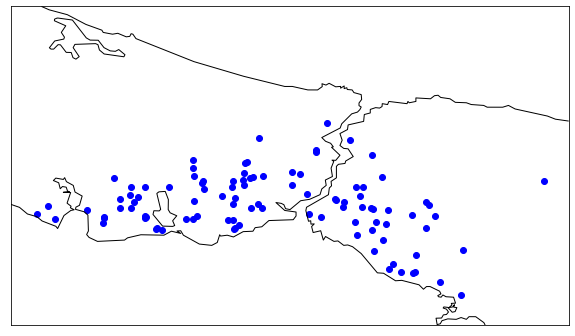

In [7]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl',llcrnrlat=40.8,urcrnrlat=41.4,\
        llcrnrlon=28.45,urcrnrlon=29.5,resolution='h')

for i in stop():
    lon, lat = float(i[2]),float(i[1])
    xpt,ypt = m(lon,lat)
    lonpt, latpt = m(xpt,ypt,inverse=True)
    m.plot(xpt,ypt,'bo')
m.drawcoastlines()
plt.show()

Ödevi daha dün gördüğüm için basemap kütüphanesini çok öğrenemedim. Tüm duraklar belli olmayacağından sadece elli tanesini ekledim. "stop" fonksiyonunda aldığım bilgileri tekrardan ayırıp enlem ve boylam olarak girdim.